# Grade: /100 + 15 Bonus

## Instructions

- Once the notebook is complete, restart your kernel and rerun your cells

- Submit this notebook to owl by the deadline

- You may use any python library functions you wish to complete the Lab assignment.

This notebook contains the questions for Assignment 2. Make sure to complete this assignment individually and appropriately reference all external code and documentation used.


### Preliminaries

Feel free to add any libraries to the Preliminaries. However, be mindful of every question's restrictions as some may exclude use of some functions.


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split , KFold
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import mean_absolute_error, mean_squared_error, classification_report, roc_curve, auc, confusion_matrix

In [ ]:
# import tensorflow as tf
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Dense
# from tensorflow.keras.regularizers import l2
# from tensorflow.keras.optimizers import Adam
# from tensorflow.keras import layers, models

: 

## Part 1 - Multi-Layer Perceptron (MLP) for Regression (65 pts)

### Dataset

The dataset `startup_success_dataset.csv` contains information on startup companies and is designed to predict the success of these companies based on various features. Your tasks involve data preprocessing, exploratory data analysis, applying machine learning models, and evaluating their performance and fairness.


The dataset contains 1000 records and 14 columns. Here's a brief overview of the columns:

1. StartupID: A unique identifier for each startup.
2. Industry: The industry sector the startup operates in (e.g., Finance, Education, Tech).
3. Age: The age of the startup in years.
4. Location: The geographical location of the startup (e.g., Asia, North America, Europe
5. Funding: The total funding received by the startup in million USD.
6. EmployeeCount: The number of employees working in the startup.
7. ProductCount: The number of products the startup has developed.
8. Patents: The number of patents held by the startup.
9. Partnerships: The number of partnerships the startup has.
10. AnnualRevenue: The annual revenue of the startup in million USD.
11. ProfitMargin: The profit margin of the startup (could be negative).
12. MarketShare: The market share of the startup in percentage.
13. CustomerSatisfaction: The customer satisfaction rating (out of 100).
14. SuccessScore: A score representing the success of the startup (the target variable we aim to predict).

Note that `StartupID` is a unique identifier and does not contribute to predictive modeling.


### Part1 Task A - Data Loading and Preprocessing (10 pts)

Load the provided startup success dataset and prepare it for analysis. Perform necessary preprocessing steps to handle any data inconsistencies and prepare the data for machine learning models.

1. Load the dataset and remove any unnecessary columns.
2. Check for missing values and handle them appropriately (handle missing values separately for numerical and categorical columns. For numerical columns, fill missing values with the mean of their respective columns. For categorical data, if missing values exist, fill them with the mode (most frequent value).
3. Encode categorical variables using **one-hot** encoding technique. For categorical variables, we have two columns to encode:
   - Industry: With 4 unique values.
   - Location: With 3 unique values.
4. Split the dataset into features and target variables (`SuccessScore`). Display the results using **.head()** function.


# A1.Loading Dataset and Performing Preprocessing Steps


## A1.1 Loading Dataset


Dataset will be loaded as DataFrame using Pandas and will be assigned a varaiable named: df


In [2]:
df=pd.read_csv("startup_success_dataset.csv")

In [3]:
df

,StartupID,Industry,Age,Location,Funding,EmployeeCount,ProductCount,Patents,Partnerships,AnnualRevenue,ProfitMargin,MarketShare,CustomerSatisfaction,SuccessScore
0,1,Finance,17,Asia,188.165509,343,7,5,8,26.657424,6.514471,28.991712,71.305764,63.721391
1,2,Education,9,Asia,52.229703,47,8,1,3,65.216576,-11.429246,8.125782,64.377673,86.092406
2,3,Tech,1,North America,86.216534,376,5,14,2,77.067519,25.855096,33.709881,58.016024,65.511363
3,4,Finance,20,Europe,174.609685,423,7,1,3,21.948196,27.398470,6.673444,64.107779,67.447699
4,5,Finance,13,Europe,168.465747,492,8,1,3,64.292718,18.357728,40.292885,61.662585,71.060720
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,Tech,3,Europe,76.413283,213,8,9,4,24.096291,0.494178,48.871252,91.935226,87.912455
996,997,Tech,6,North America,33.025550,132,7,13,3,100.003148,32.476348,14.083968,71.428231,91.394092
997,998,Education,9,Asia,157.348028,344,5,6,6,106.611091,13.832022,24.033506,86.329288,68.925611
998,999,Education,6,North America,147.021564,120,9,0,6,27.504090,10.986661,22.399773,75.503011,86.993287


Since companys' Id (startupID) is not relevent to the predective model, we will remove it from data frame by using (drop) function


In [4]:
df.drop(['StartupID'],axis=1,inplace= True)

In [5]:
df.head()

,Industry,Age,Location,Funding,EmployeeCount,ProductCount,Patents,Partnerships,AnnualRevenue,ProfitMargin,MarketShare,CustomerSatisfaction,SuccessScore
0,Finance,17,Asia,188.165509,343,7,5,8,26.657424,6.514471,28.991712,71.305764,63.721391
1,Education,9,Asia,52.229703,47,8,1,3,65.216576,-11.429246,8.125782,64.377673,86.092406
2,Tech,1,North America,86.216534,376,5,14,2,77.067519,25.855096,33.709881,58.016024,65.511363
3,Finance,20,Europe,174.609685,423,7,1,3,21.948196,27.398470,6.673444,64.107779,67.447699
4,Finance,13,Europe,168.465747,492,8,1,3,64.292718,18.357728,40.292885,61.662585,71.060720


## A1.2 Checking for Missing Values and handeling them


In [6]:
missing_values= df.isnull().sum()
print(missing_values)

Industry                0
Age                     0
Location                0
Funding                 0
EmployeeCount           0
ProductCount            0
Patents                 0
Partnerships            0
AnnualRevenue           0
ProfitMargin            0
MarketShare             0
CustomerSatisfaction    0
SuccessScore            0
dtype: int64


Based on the above output, we now know that there are no missing values, so, we can start with next steps of data preprocessing


## A1.3 Encoding Categorical Variables


since machine learning algorithm will need need to have all values as numerical values we will use one hot encoding to encode both categorical features in our data set : industry, and location using Pandas library


In [7]:
df=pd.get_dummies(df,columns=['Industry','Location']).astype(int)
df

,Age,Funding,EmployeeCount,ProductCount,Patents,Partnerships,AnnualRevenue,ProfitMargin,MarketShare,CustomerSatisfaction,SuccessScore,Industry_Education,Industry_Finance,Industry_Health,Industry_Tech,Location_Asia,Location_Europe,Location_North America
0,17,188,343,7,5,8,26,6,28,71,63,0,1,0,0,1,0,0
1,9,52,47,8,1,3,65,-11,8,64,86,1,0,0,0,1,0,0
2,1,86,376,5,14,2,77,25,33,58,65,0,0,0,1,0,0,1
3,20,174,423,7,1,3,21,27,6,64,67,0,1,0,0,0,1,0
4,13,168,492,8,1,3,64,18,40,61,71,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,76,213,8,9,4,24,0,48,91,87,0,0,0,1,0,1,0
996,6,33,132,7,13,3,100,32,14,71,91,0,0,0,1,0,0,1
997,9,157,344,5,6,6,106,13,24,86,68,1,0,0,0,1,0,0
998,6,147,120,9,0,6,27,10,22,75,86,1,0,0,0,0,0,1


## A1.4 Splitting data to features and target


will split data into: independent variables ( will be assigned as x) and dependanble variable/ Target ( will be assigned as y


In [8]:
x=df.drop(columns=['SuccessScore'])
x.head()

,Age,Funding,EmployeeCount,ProductCount,Patents,Partnerships,AnnualRevenue,ProfitMargin,MarketShare,CustomerSatisfaction,Industry_Education,Industry_Finance,Industry_Health,Industry_Tech,Location_Asia,Location_Europe,Location_North America
0,17,188,343,7,5,8,26,6,28,71,0,1,0,0,1,0,0
1,9,52,47,8,1,3,65,-11,8,64,1,0,0,0,1,0,0
2,1,86,376,5,14,2,77,25,33,58,0,0,0,1,0,0,1
3,20,174,423,7,1,3,21,27,6,64,0,1,0,0,0,1,0
4,13,168,492,8,1,3,64,18,40,61,0,1,0,0,0,1,0


In [9]:
y=df['SuccessScore']
y.head()

0    63
1    86
2    65
3    67
4    71
Name: SuccessScore, dtype: int64

### Part1 Task B - Exploratory Data Analysis (EDA) (10 pts)

1. Visualize the distribution of key features and the target variable. Your solution must focuse on visualizing the distribution of the target variable ('SuccessScore') with a histogram with kernel density estimate (KDE) overlays.
2. Generate a heatmap of the correlation matrix to identify strongly correlated features.


## B 1. Visualizing Target Variable


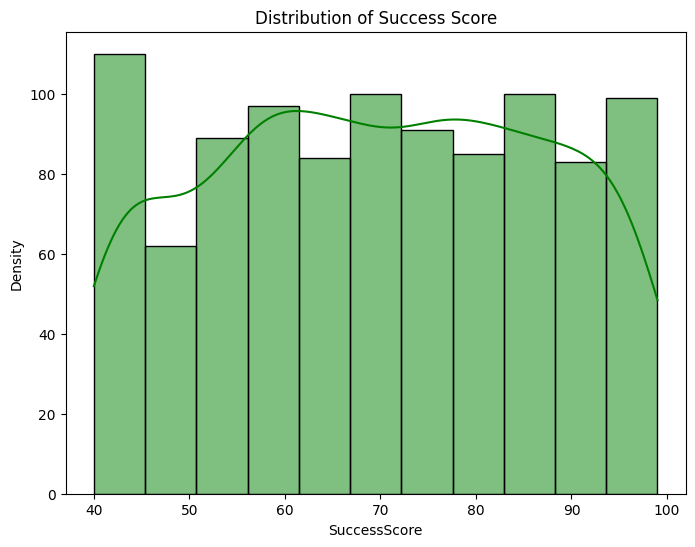

In [10]:
target_variable='SuccessScore'
plt.figure(figsize=(8,6))
sns.histplot(data=df,x=target_variable, kde=True, color='green')
plt.title('Distribution of Success Score')
plt.xlabel('SuccessScore')
plt.ylabel('Density')
plt.show()


## Visualizing Other features


Visualizing numerical features : Age, Funding, EmployeeCoun,t ProductCount, Patents, Partnerships, AnnualRevenue, ProfitMargin, MarketShare, CustomerSatisfaction . Using histogram with kde overlay . Numerical features will be assigned the color salomn for easy reading


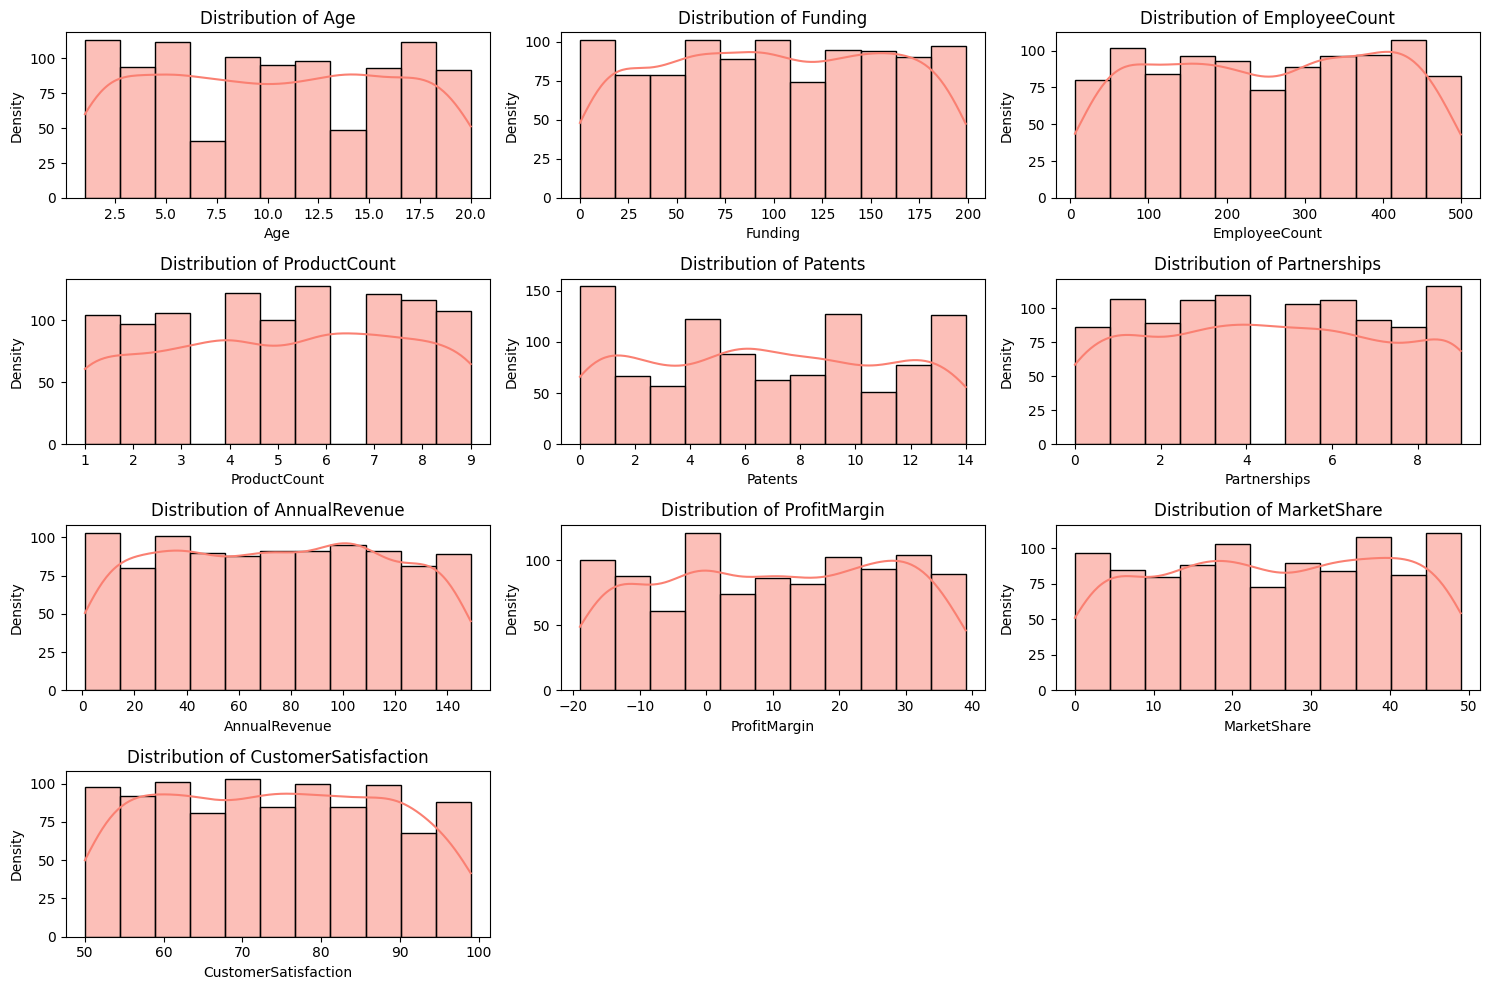

In [11]:
numerical_features = ['Age', 'Funding', 'EmployeeCount', 'ProductCount', 'Patents', 'Partnerships','AnnualRevenue', 'ProfitMargin', 'MarketShare', 'CustomerSatisfaction']

plt.figure(figsize=(15, 10))
for i, feature in enumerate(numerical_features):
    plt.subplot(4, 3, i+1)
    sns.histplot(data=df, x=feature, kde=True, color='salmon')
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Density')
plt.tight_layout()
plt.show()


Visualizing the categorical features after encoding : Industry_Education', 'Industry_Finance', 'Industry_Health', 'Industry_Tech','Location_Asia', 'Location_Europe', 'Location_North America'. Using countplots to explore frequancy of each category. Categorcial feature visuals will be given the color skyblue


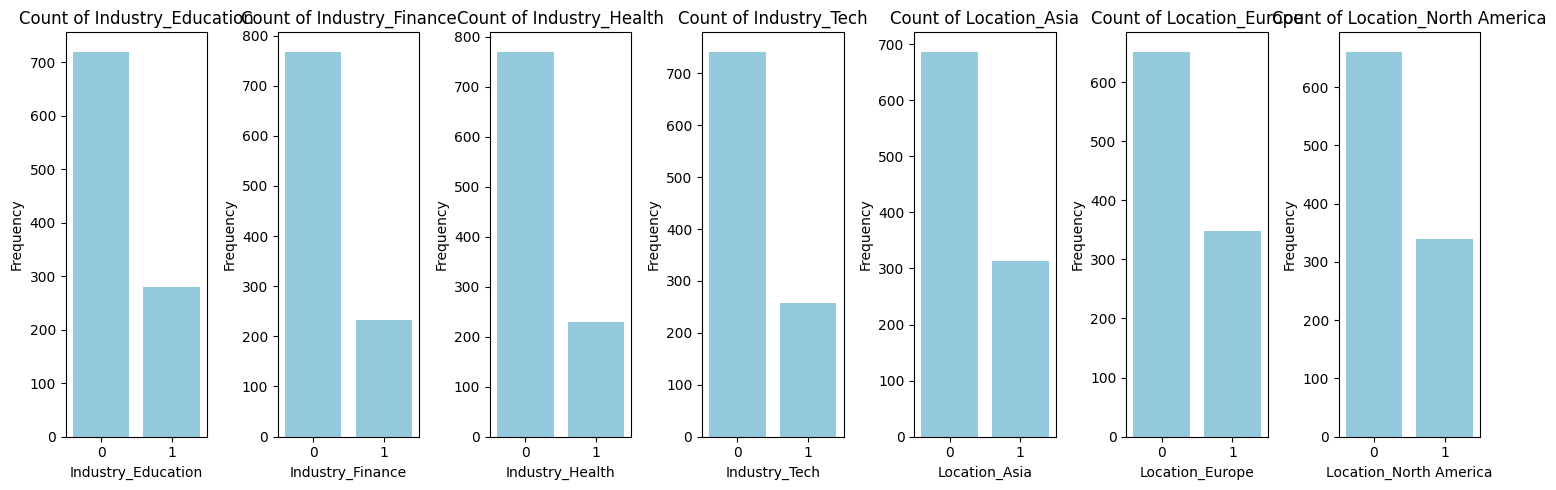

In [12]:
categorical_features = ['Industry_Education', 'Industry_Finance', 'Industry_Health', 'Industry_Tech','Location_Asia', 'Location_Europe', 'Location_North America']

plt.figure(figsize=(15,5))
for i, feature in enumerate(categorical_features):
    plt.subplot(1, len(categorical_features), i+1)
    sns.countplot(data=df, x=feature, color='skyblue')
    plt.title(f'Count of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()


## B2. Generating Heatmap ro identify strongly corelated features


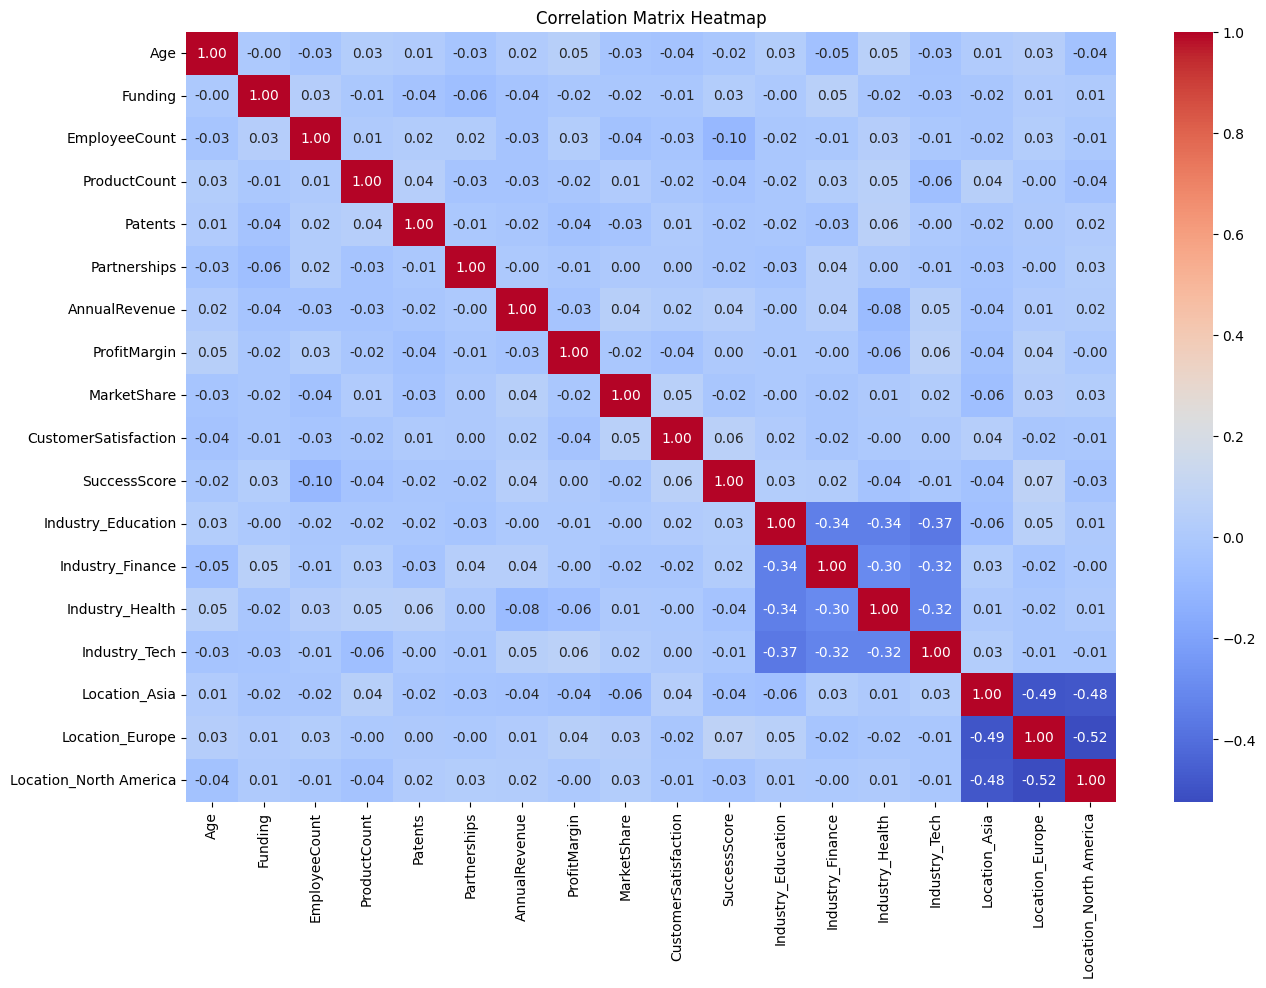

In [13]:

heat_map = df.corr()
plt.figure(figsize=(15, 10))
sns.heatmap(heat_map, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix Heatmap')
plt.show()

The heat map dosent show much of correlated data.The warmer blue in some of the encoded features is however expected and is not significant.


### Part1 Task C - Feature Engineering and PCA (10 pts)

1. Split the data into training and testing sets with 8:2 ratio and standardize the feature set. You need to use `StandardScaler` to ensure that each feature has a mean of 0 and a standard deviation of 1. This standardization is applied to both the training and testing sets to ensure consistency. Use `random_state` = 42 to ensure that the split is reproducible and fixed with every code iteration, allowing for consistent training and evaluation.
2. Plot the explained variance ratio of the principal components and determine visually the number of components to retain 80% of variance.
3. Apply PCA using the number found in the previous step to reduce the feature size.


## C1. Splitting the data into training and testing


Features are already defined as (x) and Target is already defined as (y)


In [14]:
x_train,x_test,y_train,y_test= train_test_split(x, y, test_size=0.2, random_state= 42)

Standrization of features using StandardScaler, StandardScaler will be assigned the variable (scaler)


In [15]:

# calling and assigning the scaler
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)


## C2. Fitting and Plotting PCA


Calling and fitting pca


In [16]:
pca = PCA()

In [26]:
pca.fit(x_train_scaled)
x_train_pca = pca.fit_transform(x_train_scaled)

In [27]:
x_train_scaled.mean(axis = 0), x_train_scaled.std(axis = 0)

(array([-4.88498131e-17,  0.00000000e+00, -1.92623695e-16,  1.57651669e-16,
         5.38458167e-17,  2.99760217e-17,  1.04360964e-16, -3.55271368e-17,
        -1.06581410e-16, -4.30766534e-16,  6.27276009e-17,  1.11299858e-16,
        -5.99520433e-17, -4.88498131e-17,  1.46549439e-16, -4.44089210e-17,
        -2.55351296e-17]),
 array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]))

In [25]:
pca.explained_variance_ratio_

array([9.36803357e-02, 9.12874523e-02, 8.37343294e-02, 7.88338761e-02,
       7.84763653e-02, 6.86405802e-02, 6.46846666e-02, 6.14638373e-02,
       6.06633334e-02, 5.83731462e-02, 5.74996304e-02, 5.50362530e-02,
       5.08771675e-02, 4.95877564e-02, 4.71612702e-02, 3.14801067e-32,
       5.83604309e-33])

Plotting Variance of PCA


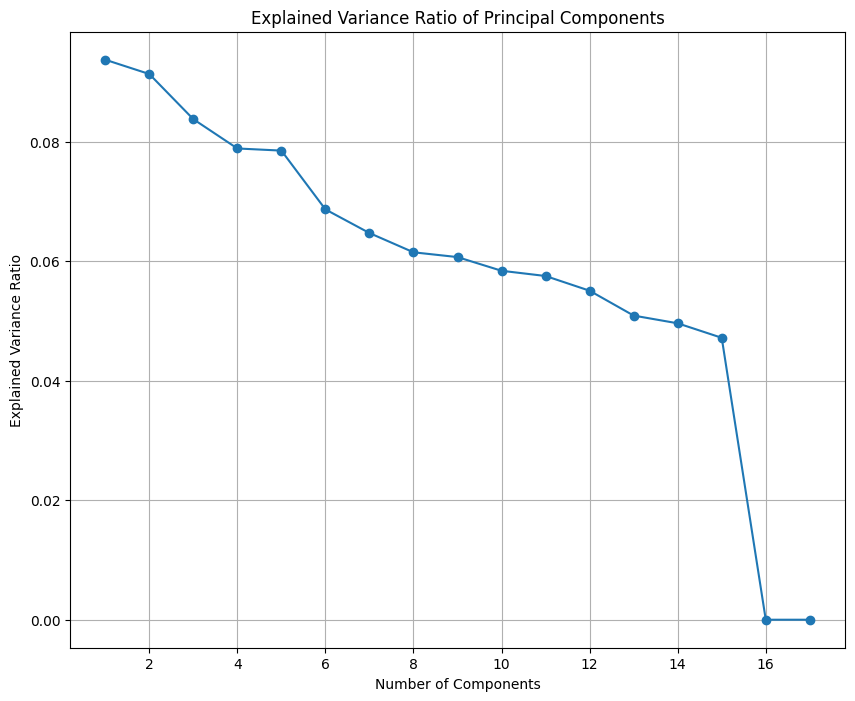

In [29]:
plt.figure(figsize=(10, 8))
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_pca.explained_variance_ratio_.cumsum(), marker='o', linestyle='-')
plt.title('Explained Variance Ratio of Principal Components')
plt.xlabel('Number of Components')
plt.ylabel('Explained Variance Ratio')
plt.grid(True)
plt.show()

In [82]:
# Calculate cumulative explained variance ratio
cumulative_variance_ratio = np.cumsum(pca.explained_variance_ratio_)

# Find the number of components to retain 80% of the variance
n_components_80_variance = np.argmax(cumulative_variance_ratio >= 0.8) + 1

print(f"Number of components to retain 80% of the variance: {n_components_80_variance}")


Number of components to retain 80% of the variance: 12


### Part1 Task D - MLP for Regression (15 pts)

1. Using **TensorFlow's Keras API**, develop and train two MLP regressors over 100 epochs with a batch size of 32:

   - For Model 1, incorporate a single hidden layer containing 32 neurons.
   - Model 2 should feature two hidden layers, with the first layer comprising 32 neurons and the second layer 16 neurons.
   - Additionally, implement a Random Forest Regressor as the traditional regression algorithm to compare its performance against the ANN models.
   - Incorporate L2 regularization in models, use Adam optimizer with a learning rate of **0.01** and **Relu** activation function in hidden layers.

2. Evaluate the model's performance on the test set using Mean Squared Error (MSE) and Mean Absolute Error (MAE) metrics.
3. **(Written Answer)** Compare the models and write your conclusion.

Note:

- You might need to create a new optimizer instance for each model. This ensures that each model's training process is independent and avoids conflicts arising from shared optimizer state.
- You can choose between the **Sequential model** from TensorFlow's Keras API and the **MLPRegressor** from scikit-learn for your solution. The former provides a highly flexible and customizable framework for constructing neural networks, allowing for detailed adjustments to model architecture and training procedures. On the other hand, the latter, built on scikit-learn, offers a more direct method for developing multilayer perceptron models tailored specifically to regression tasks, with less complexity in customization but efficiency in straightforward applications.


**Place holder for Written Answer**


### Part1 Task E - Gridsearch for Hyperparameter Optimization (HPO) (20 pts)

1. Define a range of potential values for hyperparameters as follows:
   - `hidden_layer_sizes`:50, 100, 150
   - `activation`: tanh','relu'
   - `learning rate`: 0.0001, 0.001, 0.01
2. Use GridSearchCV to find the best hyperparameter values based on 3 fold cross-validation on MLP model2 from TaskD.
3. Retrain the model using the optimized hyperparameters and evaluate its performance.
4. **(Written Answer)** Comparing the performance of MLP model2 before (from TaskD) and after hyperparameter tuning.


**Place holder for Written Answer**


## Part 2 - Binary Classification with a Custom MLP (35 pts)

### Background

You are provided with a schematic of a simple Multilayer Perceptron (MLP) neural network designed for binary classification. This network consists of an input layer with two binary inputs, $x_1$ and $x_2$, a hidden layer with two neurons, $h_1$ and $h_2$, and one output neuron, $y$. The weights and biases are pre-defined as follows:

- Weights from the input to hidden layer: $w_{11} = 20, w_{12} = -20, w_{21} = 20, w_{22} = -20$
- Biases for the hidden layer neurons: $b_{1} = -10, b_{2} = 30$
- Weights from the hidden layer to the output layer are both $20$.
- The bias for the output neuron is $-30$.

!["The simple Multilayer Perceptron (MLP) neural network"](./NNQ.png)

P.S. For the image to display correctly, it must be located in the same folder as your Assignment #2 file: `Assignment2.ipynb`.

### Objective

Implement a Python program that simulates the described MLP network's forward pass and computes the output for different input combinations.


### Part2 Task A - Sigmoid Activation Function (20 pts)

Write a function that takes binary inputs $x_1$ and $x_2$ and computes the output $y$ using a sigmoid activation function for both the hidden and output layers.
Calculate and print the predicted output for the following input pairs: (0,0), (0,1), (1,0), (1,1). Round the output to the nearest integer.


### Part2 Task B - Linear Activation Function (10 pts)

Modify the function from TaskA to use a linear activation function instead of the sigmoid.
Calculate and print the predicted output for the same input pairs as above.


### Part2 TaskC - Hidden Neuron operation (3 pts)

Analyze the function of the hidden neuron $h_{1}$ when using a sigmoid activation function. Discuss which logical problem (\(e.g., AND, OR, XOR\)) $h_{1}$ is solving.


**Placeholder for Task C answer**


### Part2 Task D - MLP operation (2 pts)

Consider the entire network with a sigmoid activation function. Discuss which logical problem the MLP is designed to solve considering the weights and biases configuration.


**Placeholder for Task D answer**


## Part 3 - Convolutional Neural Network (CNN) - (15 Bonus pts)

### Objective:

Develop a Convolutional Neural Network (CNN) model to classify handwritten digits from the MNIST dataset. Your tasks involve loading and preprocessing the dataset, designing a CNN architecture, training the model while reserving a portion of the data for validation, and evaluating the model's performance. Additionally, assess if the model exhibits overfitting through the analysis of learning curves.


### Part3 TaskA - Image Classification (20 pts)

1. Load the MNIST Dataset which consists of grayscale images of handwritten digits. Normalize the image pixel values to a range of [0, 1], reshape the images to fit the CNN input requirements and convert the labels to one-hot encoded vectors for classification.
2. Design a CNN architecture for classifying MNIST handwritten digits with input layer of 28x28 pixel grayscale images, followed by three convolutional layers with ReLU activation (the first with 32 filters of size 3x3, the second with 64 filters of size 3x3 plus a max pooling layer of size 2x2, and the third also with 64 filters of size 3x3 followed by another max pooling layer of size 2x2). After these, a flatten layer transitions the output to a 1D vector, leading to a dense layer with 64 units (ReLU activation), and culminating in an output layer with 10 units for the 10 digit classes (0-9) using softmax activation.
3. Keep 20% of MNIST training dataset for validation and train the CNN on the remaining part of MNIST training dataset.
4. Plot the learning curves.
5. **(Written Answer)** Explain whether the model overfits or not.
6. Evaluate the model's accuracy and F1-score on the MNIST test dataset.


**Place holder for Written Answer**
